#2 задача.
#Классический способ решения

Сначала загрузим всю папку с фотографиями в Collab:

In [1]:
import cv2
from IPython.display import Image
import io
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload()


Saving 00cf8c15-5b7f-4a37-8f2d-441081838382.png to 00cf8c15-5b7f-4a37-8f2d-441081838382.png
Saving 00ea7024-ed52-4389-9605-84c980e57140.png to 00ea7024-ed52-4389-9605-84c980e57140.png
Saving 0a0a423e-a44f-43e3-b034-2a8d8ba8d2ce.png to 0a0a423e-a44f-43e3-b034-2a8d8ba8d2ce.png
Saving 0a6f13e7-1de1-4422-85fd-33c54a126ac5(1).png to 0a6f13e7-1de1-4422-85fd-33c54a126ac5(1).png
Saving 0a6f13e7-1de1-4422-85fd-33c54a126ac5.png to 0a6f13e7-1de1-4422-85fd-33c54a126ac5.png
Saving 0a638003-651f-4ee9-8f7e-32eb9c5ea585.png to 0a638003-651f-4ee9-8f7e-32eb9c5ea585.png
Saving 0ab2f67e-27dc-4922-a554-24ebf96e3948.png to 0ab2f67e-27dc-4922-a554-24ebf96e3948.png
Saving 0ada0810-16be-4bcf-a34c-bc306facb4f3.png to 0ada0810-16be-4bcf-a34c-bc306facb4f3.png
Saving 0bc3d0eb-05fc-41bd-bb09-724be6cd0e16.png to 0bc3d0eb-05fc-41bd-bb09-724be6cd0e16.png
Saving 0c123e60-88a6-4fed-b6a0-73580e7c1b6c.png to 0c123e60-88a6-4fed-b6a0-73580e7c1b6c.png
Saving 0c659d22-e5f1-4fe1-9a4a-99dfc217d2d0.png to 0c659d22-e5f1-4fe1-9a4a

Загрузим картинку из нашей директории в память с помощью open cv и дальше будем работать в нем

In [10]:
sstr = 'fd9bbe6d-4b41-424b-9261-a1252100bd57.png'
img = cv2.imread('/content/' + sstr)

Выведем эту картинку:

[[30 27 32 ... 32 34 28]
 [32 32 30 ... 31 31 32]
 [30 27 32 ... 28 39 31]
 ...
 [31 30 30 ... 32 31 31]
 [35 32 26 ... 30 31 24]
 [32 34 27 ... 27 27 27]]


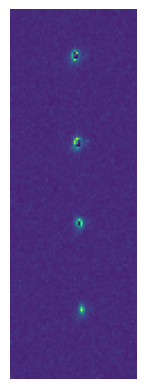

In [13]:
import matplotlib.pyplot as plt

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray)
#plt.figure(figsize=(8, 6))
plt.imshow(gray)
plt.axis('off')
plt.show()

Разметим на этой фотографии места, куда попадают (или не попадают) фотографии ионов, и выведем их

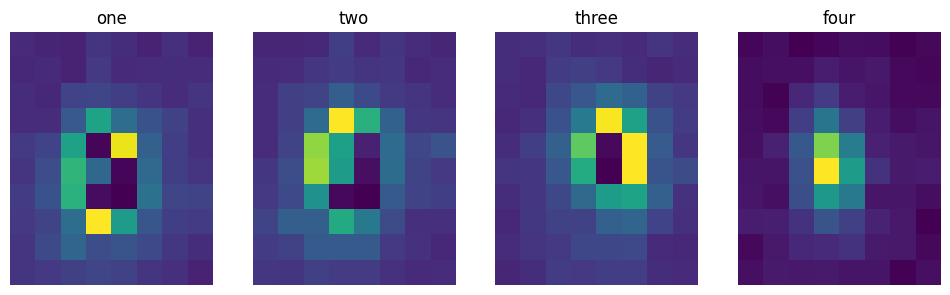

In [12]:
one = gray[15:25, 25:33]
two = gray[54:64,26:34]
three = gray[90:100, 26:34]
four = gray[128:138,28:36]
#four[0][0] = 0


fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(one)
axes[0].set_title('one')
axes[0].axis('off')

axes[1].imshow(two)
axes[1].set_title('two')
axes[1].axis('off')

axes[2].imshow(three)
axes[2].set_title('three')
axes[2].axis('off')

axes[3].imshow(four)
axes[3].set_title('four')
axes[3].axis('off')

#plt.tight_layout()
plt.show()


Далее подгрузим файл labeled_ions_samples, в котором мы провели ручную разметку 25 фотографий и выведем его:

In [139]:
uploaded2 = files.upload()

Saving labeled_ions_samples.xlsx to labeled_ions_samples (1).xlsx


In [140]:
import pandas as pd
data_raw = pd.read_excel(io.BytesIO(uploaded2['labeled_ions_samples (1).xlsx']))
df = data_raw.drop(['Unnamed: 0'], axis=1)
df

,Filename,1 state,2 state,3 state,4 state
0,760e3945-e0c9-4c9a-b78a-a68fbbee05cd.png,0.0,1.0,1.0,1.0
1,bc09db3b-dedf-49da-946c-efdf2304551b.png,1.0,0.0,1.0,1.0
2,45da543d-c099-4e17-9e18-f3c2776ae8b7.png,0.0,1.0,1.0,1.0
3,fbe18a1d-a194-4581-ad61-8aff1dcf045d.png,1.0,1.0,1.0,1.0
4,ccb1fa64-1a46-4680-82e3-178495a9121c.png,1.0,1.0,0.0,1.0
5,2067c2f1-a36b-4892-b96e-43028b0fea2d.png,1.0,1.0,1.0,1.0
6,687e714c-d32b-4c6b-9e26-d9dea275bccd.png,1.0,1.0,1.0,1.0
7,1813bf7c-24cc-4af0-a032-b70cfa74fbfa.png,1.0,0.0,1.0,1.0
8,7fd7c561-7522-46aa-b95b-9b66353eb63c.png,1.0,1.0,1.0,1.0
9,0f1ef869-4992-4a1a-af0d-9ed7dbc8d0fc.png,1.0,1.0,1.0,1.0


Создадим датасет data, в котором будут храниться маски пикселей в форме вектора для каждых ионов и бинарное значение ионов 0/1, получается, что с каждого фото - 4 строчки в датасете

In [142]:
data = {'vector': [],
        'class': [],
        }
data = pd.DataFrame(data)

for j in range(25):
  df['Filename'][j]
  sstr = df['Filename'][j]
  img = cv2.imread('/content/' + sstr)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  one = gray[15:25, 25:33]
  two = gray[54:64,26:34]
  three = gray[90:100, 26:34]
  four = gray[128:138,28:36]

  data.loc[len(data.index)] = [one.reshape(80), int(df['1 state'][j])]
  data.loc[len(data.index)] = [two.reshape(80), int(df['2 state'][j])]
  data.loc[len(data.index)] = [three.reshape(80), int(df['3 state'][j])]
  data.loc[len(data.index)] = [four.reshape(80), int(df['4 state'][j])]

data

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


,vector,class
0,"[31, 32, 36, 30, 24, 27, 30, 24, 31, 30, 42, 2...",0
1,"[30, 32, 32, 32, 30, 39, 34, 34, 31, 36, 32, 3...",1
2,"[40, 32, 32, 35, 40, 30, 30, 39, 34, 30, 38, 4...",1
3,"[31, 36, 44, 44, 44, 36, 32, 30, 30, 36, 44, 5...",1
4,"[32, 24, 24, 30, 30, 36, 36, 35, 42, 30, 44, 3...",1
...,...,...
95,"[26, 32, 51, 44, 30, 28, 26, 24, 32, 30, 36, 4...",1
96,"[28, 27, 30, 38, 34, 34, 28, 35, 28, 30, 30, 3...",1
97,"[30, 27, 36, 34, 32, 27, 32, 35, 35, 40, 39, 4...",1
98,"[32, 28, 35, 36, 34, 36, 31, 43, 28, 30, 40, 3...",1


Приведем датасет к "MNIST"-виду:
X - датасет с 80 значениями пикселей для каждой маски иона

y - наличие существования иона на маске

In [143]:
arr = []
X = data['vector']
y = data['class']
for i in X:
  arr.append(list(i))
X = pd.DataFrame(arr)
X

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,31,32,36,30,24,27,30,24,31,30,...,31,28,40,28,27,30,36,30,35,38
1,30,32,32,32,30,39,34,34,31,36,...,40,34,27,32,47,47,48,40,34,32
2,40,32,32,35,40,30,30,39,34,30,...,49,38,34,30,39,44,44,32,32,42
3,31,36,44,44,44,36,32,30,30,36,...,36,40,32,38,53,76,57,45,42,30
4,32,24,24,30,30,36,36,35,42,30,...,30,36,39,44,59,53,47,32,32,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26,32,51,44,30,28,26,24,32,30,...,36,35,42,40,42,51,39,30,36,32
96,28,27,30,38,34,34,28,35,28,30,...,39,42,44,42,45,79,57,53,38,36
97,30,27,36,34,32,27,32,35,35,40,...,28,47,40,42,53,61,36,36,32,32
98,32,28,35,36,34,36,31,43,28,30,...,32,43,28,40,36,36,36,31,27,28


Проведем нормализацию датасета:

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [ ]:
Создадим Support Vector Machine и построим модель на основе существующей выборки:

In [191]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf')
model.fit(X, y)

SVC()

Как мы можем видеть, модель обрабатывает с точностью 0.98 на существующей выборке:

In [196]:
import numpy as np
y_pred = model.predict(X)
np.mean(y == y_pred)

0.98

In [ ]:
Построим функцию, которая по имени фотографии будет возвращать массив из 0 и 1, из которого будет понятно, попал ли ион на камеру, и выведем рандомную фотографию:

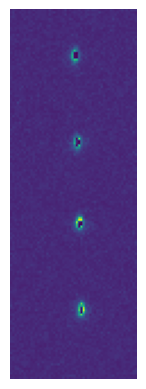

array([1, 1, 1, 1])

In [197]:
def pred(sstr):
  img = cv2.imread('/content/' + sstr)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  one = gray[15:25, 25:33].reshape(80)

  two = gray[54:64,26:34].reshape(80)
  three = gray[90:100, 26:34].reshape(80)
  four = gray[128:138,28:36].reshape(80)
  arr = []
  arr.append(list(one))
  arr.append(list(two))
  arr.append(list(three))
  arr.append(list(four))
  input = pd.DataFrame(arr)
  scaler = StandardScaler()
  scaler.fit(input)
  input = pd.DataFrame(scaler.transform(input), columns=input.columns, index=input.index)
  output = model.predict(input)
  plt.imshow(gray)
  plt.axis('off')
  plt.show()
  return output

pred('e211f9d3-04cd-4ae8-9b24-a11bd70cc5ad.png')

Далее пробежимся по всем фотографиям и построим датасет, который требуется в качестве выхода задачи

In [200]:

def pred(sstr):
  img = cv2.imread('/content/' + sstr)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  one = gray[15:25, 25:33].reshape(80)
  two = gray[54:64,26:34].reshape(80)
  three = gray[90:100, 26:34].reshape(80)
  four = gray[128:138,28:36].reshape(80)
  arr = []
  arr.append(list(one))
  arr.append(list(two))
  arr.append(list(three))
  arr.append(list(four))
  input = pd.DataFrame(arr)
  scaler = StandardScaler()
  scaler.fit(input)
  input = pd.DataFrame(scaler.transform(input), columns=input.columns, index=input.index)
  output = model.predict(input)
  return output


result = {'Filename':[],	'Qubit 1 state':[],	'Qubit 2 state':[],	'Qubit 3 state':[],	'Qubit 4 state':[],
        }
result = pd.DataFrame(result)

for i in uploaded.keys():
  out = pred(i)
  result.loc[len(result.index)] = [i, out[0], out[1], out[2], out[3]]

Выведем result

In [202]:
result

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,00cf8c15-5b7f-4a37-8f2d-441081838382.png,1,1,1,1
1,00ea7024-ed52-4389-9605-84c980e57140.png,1,1,1,0
2,0a0a423e-a44f-43e3-b034-2a8d8ba8d2ce.png,1,1,1,1
3,0a6f13e7-1de1-4422-85fd-33c54a126ac5(1).png,1,1,1,1
4,0a6f13e7-1de1-4422-85fd-33c54a126ac5.png,1,1,1,1
...,...,...,...,...,...
1015,fde40a1c-64c1-4503-a3c9-139425bbfe38.png,1,1,1,1
1016,fe9fc73f-11e2-4c0c-8905-9b9a06fa6186.png,0,1,0,1
1017,fe561590-1c7e-4b5a-a8df-6de3bab2bb34.png,1,1,1,0
1018,fe579857-f073-4e1f-b70f-dea81f38bd31.png,1,1,1,1


И сохраним его:

In [205]:
import os
#os.makedirs('folder/subfolder', exist_ok=True)
df.to_csv('folder/subfolder/labeled_ions_team_team17.csv')